In [1]:
import time
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

## Load Dataset

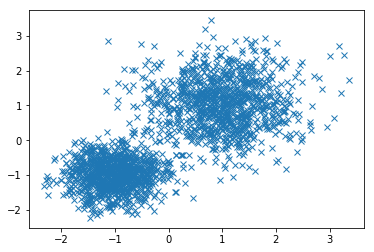

In [2]:
dict = sio.loadmat('./datasets/dataset1')
samples = dict['samples']
labels = dict['labels']
labels = np.reshape(labels, -1) #change 2d vector (n, 1) to 1d vector (n,)
sample_num, sample_dim = samples.shape # N x D
plt.plot(samples[:,0], samples[:,1],'x')

## Implementation

kmeans1

In [3]:
def kmeans1(samples, K, max_iter=20):
    # most straight forward implementation, low efficiency
    N, D = samples.shape
    centers = np.random.rand(K, D)
    labels = -np.ones(N)
    for i in range(max_iter):
        
        #step 1: update labels
        for j in range(N):
            x = samples[j]
            dmin = 1e30
            for k in range(K):
                d_jk = np.sum((x-centers[k])**2) #distance from sample j to center k
                if d_jk < dmin:
                    dmin = d_jk
                    labels[j] = k
                    
        #step 2: update centers
        new_centers = np.zeros((K, D))
        cluster_size = np.zeros(K)
        for n in range(N):
            k = int(labels[n])
            x = samples[n]
            new_centers[k] += x
            cluster_size[k] += 1
            
        for k in range(K):
            centers[k] = new_centers[k]/cluster_size[k]
    return centers, labels

kmeans2

In [4]:
def kmeans2(samples, K, max_iter=20):
    
    # vectorized implementation, high efficiency
    N, D = samples.shape
    centers = np.random.rand(K, D)
    labels = -np.ones(N)
    for i in range(max_iter):
        
        #step 1: update labels
        for j in range(N):
            x = samples[j]
            dist = np.sum((x-centers)**2, 1)
            labels[j] = np.argmin(dist)
            
        #step 2: update centers
        for k in range(K):
            centers[k] = np.mean(samples[labels==k])
    return centers, labels

**Implementation of kmeans3**

the adaption to kmeans2 is that the number of circulation when calculating distance is reduced to number of centers

In [5]:
def kmeans3(samples, K, max_iter=20):
    
    # vectorized implementation, high efficiency
    N, D = samples.shape
    
    idx = np.random.randint(N, size=K)
    centers = samples[idx]
    labels = -np.ones(N)
    
    # to store distance, each line is distance to every center
    dist = np.zeros((N,K))
    
    for i in range(max_iter):
        
        # step 1: update labels
        # the adaption to kmeans2 is that the number of circulation is reduced to number of centers
        for c in range(K):
            center = centers[c]
            dist[:, c] = np.sum((samples-center)**2, 1)
        
        labels = np.argmin(dist, axis=1)   
            
        # step 2: update centers
        for k in range(K):
            centers[k] = np.mean(samples[labels==k])
            
    return centers, labels

## Comparison

**Execution time of sklearn.cluster.KMeans**

In [6]:
t1=time.process_time()
kmeans = KMeans(n_clusters=2, max_iter=100)
kmeans.fit(samples)
t2=time.process_time()
t_sklearnkmeans = t2-t1
t_sklearnkmeans

0.015625

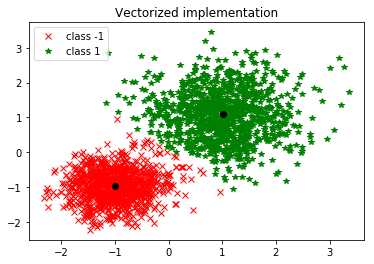

In [7]:
centers, labels = kmeans.cluster_centers_, kmeans.labels_
plt.plot(samples[labels==1,0],samples[labels==1, 1],'rx')
plt.plot(samples[labels==0,0],samples[labels==0, 1],'g*')
plt.legend({'class 1', 'class -1'})
plt.title('Vectorized implementation')
plt.plot(centers[:, 0], centers[:, 1], 'ko')

**Execution time of kmeans1**

In [8]:
t1=time.process_time()
centers, labels = kmeans1(samples, 2, max_iter=100)
t2=time.process_time()
t_kmeans1 = t2-t1
t_kmeans1

2.875

**Execution time of kmeans2**

In [9]:
t1=time.process_time()
centers, labels = kmeans2(samples, 2, max_iter=100)
t2=time.process_time()
t_kmeans2 = t2-t1
t_kmeans2

1.625

**Execution time of kmeans3**

In [10]:
t1=time.process_time()
centers, labels = kmeans3(samples, 2, max_iter=100)
t2=time.process_time()
t_kmeans3 = t2-t1
t_kmeans3

0.015625

Visualize to validate correctness

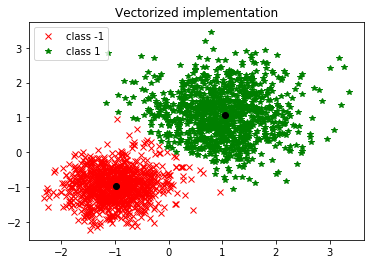

In [11]:
centers, labels = kmeans3(samples, 2, max_iter=5)
plt.plot(samples[labels==1,0],samples[labels==1, 1],'rx')
plt.plot(samples[labels==0,0],samples[labels==0, 1],'g*')
plt.legend({'class 1', 'class -1'})
plt.title('Vectorized implementation')
plt.plot(centers[:, 0], centers[:, 1], 'ko')

In [12]:
print('Execution time for %s is %f s' % ('sklearn.cluster.KMeans', t_sklearnkmeans))
print('Execution time for %s is %f s' % ('kmeans1', t_kmeans1))
print('Execution time for %s is %f s' % ('kmeans2', t_kmeans2))
print('Execution time for %s is %f s' % ('kmeans3', t_kmeans3))

Execution time for sklearn.cluster.KMeans is 0.015625 s
Execution time for kmeans1 is 2.875000 s
Execution time for kmeans2 is 1.625000 s
Execution time for kmeans3 is 0.015625 s
